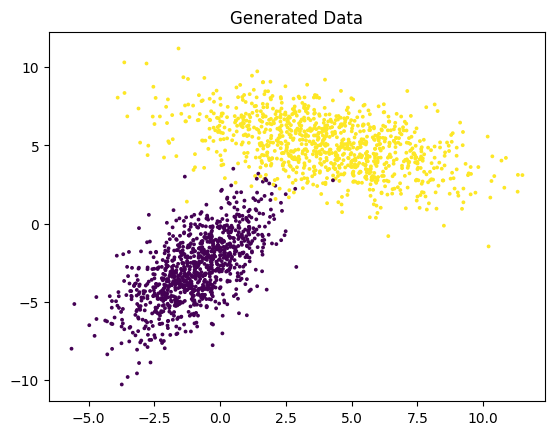

For n_clusters=2, silhouette average=0.629
For n_clusters=3, silhouette average=0.531
For n_clusters=4, silhouette average=0.479
Means (центри кластерів):
[[ 4.01584647  5.03003659]
 [-0.92260717 -2.89030298]]
Covariances (коваріації кластерів):
[[[ 7.25356295 -2.23217403]
  [-2.23217403  3.11208382]]

 [[ 1.98903587  1.97463848]
  [ 1.97463848  4.75287644]]]


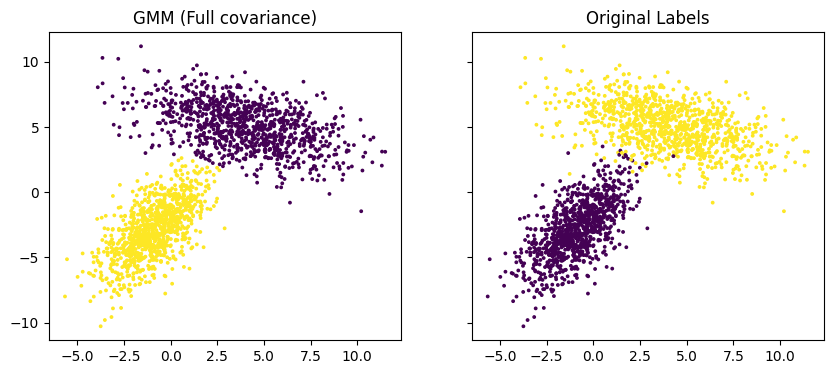

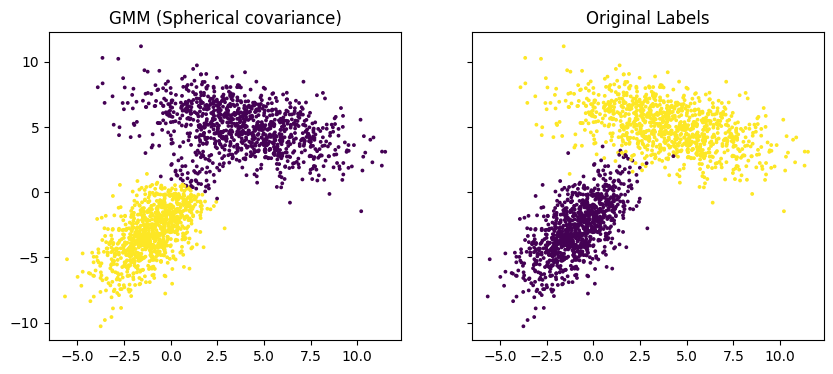

In [2]:
# EM Clustering (Gaussian Mixture) з коментарями українською

import numpy as np  # Для роботи з масивами та генерації випадкових чисел
import matplotlib.pyplot as plt  # Для візуалізації
from sklearn.mixture import GaussianMixture  # Алгоритм EM (Gaussian Mixture Model)
from sklearn.metrics import silhouette_score  # Метрика для оцінки якості кластеризації
from sklearn.utils import shuffle  # Для перемішування даних

# ----------------------------
# Генерація даних
# ----------------------------
num_points = 1000  # Кількість точок у кожному кластері

# Перший кластер з нормальним розподілом
mean_1 = [-1, -3]  # Середнє значення по кожній осі
cov_1 = [[2, 2], [2, 5]]  # Ковариаційна матриця (розсіювання)
x_1 = np.random.multivariate_normal(mean_1, cov_1, num_points)  # Генерація точок

# Другий кластер з нормальним розподілом
mean_2 = [4, 5]
cov_2 = [[7, -2], [-2, 3]]
x_2 = np.random.multivariate_normal(mean_2, cov_2, num_points)

# Об'єднання обох кластерів у один масив
X = np.concatenate([x_1, x_2])
y = np.array([0] * num_points + [1] * num_points)  # Справжні мітки
X, y = shuffle(X, y, random_state=0)  # Перемішування даних для уникнення впорядкування

# Візуалізація згенерованих даних
plt.scatter(X[:, 0], X[:, 1], s=3, c=y, cmap='viridis')
plt.title("Generated Data")
plt.show()

# ----------------------------
# Silhouette score для оцінки якості кластеризації
# ----------------------------
for i in range(2, 5):  # Перевіряємо моделі з 2, 3 та 4 кластерами
    gmm = GaussianMixture(n_components=i, covariance_type='full', random_state=0)  # Ініціалізація GMM
    gmm_labels = gmm.fit_predict(X)  # Навчання моделі та отримання міток кластерів
    silhouette_avg = silhouette_score(X, gmm_labels)  # Розрахунок середнього коефіцієнта силуету
    print(f"For n_clusters={i}, silhouette average={silhouette_avg:.3f}")  # Вивід результату

# ----------------------------
# Демонстрація типу ковариації
# ----------------------------
# Повна ковариація
GMM = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
GMM.fit(X)  # Навчання моделі
print("Means (центри кластерів):")
print(GMM.means_)
print("Covariances (коваріації кластерів):")
print(GMM.covariances_)

# Прогнозування міток
labels = GMM.predict(X)

# Візуалізація кластерів та оригінальних міток
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
ax1.set_title('GMM (Full covariance)')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original Labels")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)
plt.show()

# ----------------------------
# Сферична ковариація
# ----------------------------
GMM = GaussianMixture(n_components=2, covariance_type='spherical', random_state=0)
GMM.fit(X)  # Навчання моделі

labels = GMM.predict(X)  # Прогнозування міток

# Візуалізація кластерів та оригінальних міток
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,4))
ax1.set_title('GMM (Spherical covariance)')
ax1.scatter(X[:,0], X[:,1], c=labels, s=3)
ax2.set_title("Original Labels")
ax2.scatter(X[:,0], X[:,1], c=y, s=3)
plt.show()
